 Prepare the general libraries.

In [1]:
# libraries
library(community)
library(ggplot2)

 Prepare the path.

In [2]:
# the path to the counts, cell annotation and sample annation file. In this case its our working dir same as
# the notebook
path_in <- '../../../../results/method_comparison/compare_algorithms/community/'

print("path_in")
print(path_in)

[1] "path_in"
[1] "../../../../results/method_comparison/compare_algorithms/community/"


Load data.

In [3]:
suppressWarnings(load(paste0(path_in,"/interactions.RData")))

Load functions for visualization.

In [5]:
load("visualization_functions.RData")

## Parameters

In [6]:
# threshold for log2FC of the weights
threshold_log2FC <- interactions$thresholds$threshold_log2FC

idx_up <- interactions$anno_interactions$log2FC_weights > threshold_log2FC
idx_unchanged <- abs(interactions$anno_interactions$log2FC_weights)<= threshold_log2FC
idx_down <- interactions$anno_interactions$log2FC_weights < -threshold_log2FC
idx_sign <- !is.na(interactions$anno_interactions$sign) & interactions$anno_interactions$sign
idx_good <- interactions$anno_interactions$passed_QC_filter

In [7]:
# extract cell types
cell_types <- unique(interactions$anno_cells$cell_type)
print(cell_types)

[1] "Mono" "Gran" "T"    "NK"   "B"    "HSPC" "Ery"  "DC"  


In [8]:
# define broad type of interactions by cell types
immune_cell_types <- cell_types[!(cell_types %in% c("Ery","HSPC"))]

interaction_cell_types <- unique(paste(interactions$anno_interactions$sending_cell_type
                                ,interactions$anno_interactions$receiving_cell_type
                                ,sep = " to "))

interaction_type <- sapply(interaction_cell_types
                           ,function(i){
                               ifelse(grepl("Ery",i)
                                      ,"engages Ery"
                                      ,ifelse(grepl("HSPC",i)
                                              ,"engages HSPC"
                                              ,"among immune cells"))
                           })
print(str(interaction_type))

interaction_type_by_ID <- sapply(interactions$anno_interactions$interaction_ID
                           ,function(i){
                               ifelse(grepl("Ery",i)
                                      ,"engages Ery"
                                      ,ifelse(grepl("HSPC",i)
                                              ,"engages HSPC"
                                              ,"among immune cells"))
                           })
print(str(interaction_type_by_ID))

colors_interaction_type <- c("engages HSPC" = "magenta"
                             ,"among immune cells" = "deepskyblue"
                             ,"engages Ery" = "lightgoldenrod"
                            )
print(colors_interaction_type)

 Named chr [1:64] "among immune cells" "among immune cells" ...
 - attr(*, "names")= chr [1:64] "Mono to Mono" "Mono to Gran" "Mono to T" "Mono to NK" ...
NULL
 Named chr [1:120576] "among immune cells" "among immune cells" ...
 - attr(*, "names")= chr [1:120576] "Mono:A2M_Mono:LRP1" "Mono:ADM_Mono:ACKR3" "Mono:ADM_Mono:ADRB2" "Mono:ADM_Mono:CALCRL" ...
NULL
      engages HSPC among immune cells        engages Ery 
         "magenta"      "deepskyblue"   "lightgoldenrod" 


## Visualization: all good quality interactions

### Mean weight vs mean number 

In [9]:
library(ggrepel) # to add text labels on the mean weigth vs number of interactions plot

In [10]:
# claclulate mean weight of good interactions for each cell type to cell type communication (i.e. "T to B", "DC to T")
mean_weights_goodInteractions <- mean_weights(interactions)

print(str(mean_weights_goodInteractions))

List of 2
 $ AML    :'data.frame':	8 obs. of  8 variables:
  ..$ Mono: num [1:8] 0.07131 0.06253 0.01909 0.01418 0.00953 ...
  ..$ Gran: num [1:8] 0.0644 0.0764 0.0202 0.0123 0.0235 ...
  ..$ T   : num [1:8] 0.0188 0.0237 0.1439 0.1009 0.0344 ...
  ..$ NK  : num [1:8] 0.0145 0.0152 0.103 0.085 0.0214 ...
  ..$ B   : num [1:8] 0.00902 0.02341 0.0353 0.02053 0.02555 ...
  ..$ HSPC: num [1:8] 0.016 0.0341 0.0397 0.0252 0.0317 ...
  ..$ Ery : num [1:8] 0.00134 0.00716 0.00946 0.00309 0.00952 ...
  ..$ DC  : num [1:8] 0.0197 0.0255 0.0418 0.0311 0.0094 ...
 $ healthy:'data.frame':	8 obs. of  8 variables:
  ..$ Mono: num [1:8] 0.0519 0.0724 0.0396 0.0312 0.0384 ...
  ..$ Gran: num [1:8] 0.0725 0.1127 0.0559 0.037 0.0595 ...
  ..$ T   : num [1:8] 0.0449 0.0609 0.062 0.0335 0.052 ...
  ..$ NK  : num [1:8] 0.0339 0.04 0.0338 0.0243 0.0263 ...
  ..$ B   : num [1:8] 0.0448 0.0656 0.0497 0.0265 0.0787 ...
  ..$ HSPC: num [1:8] 0.01079 0.01578 0.0083 0.00605 0.00876 ...
  ..$ Ery : num [1:8] 0.0078

In [11]:
# claclulate number of good interactions for each cell type to cell type communication (i.e. "T to B", "DC to T")
number_goodInteractions <- number_interactions(interactions)

print(str(number_goodInteractions))

List of 2
 $ AML    :'data.frame':	8 obs. of  8 variables:
  ..$ Mono: int [1:8] 224 210 120 129 126 184 110 202
  ..$ Gran: int [1:8] 204 204 112 129 118 177 133 201
  ..$ T   : int [1:8] 110 105 71 80 72 101 69 103
  ..$ NK  : int [1:8] 93 94 61 69 58 87 48 96
  ..$ B   : int [1:8] 97 100 58 58 63 88 54 93
  ..$ HSPC: int [1:8] 166 167 102 107 98 151 104 168
  ..$ Ery : int [1:8] 108 136 75 67 77 129 98 98
  ..$ DC  : int [1:8] 167 172 90 105 100 145 77 171
 $ healthy:'data.frame':	8 obs. of  8 variables:
  ..$ Mono: int [1:8] 223 209 119 129 126 189 120 205
  ..$ Gran: int [1:8] 206 207 114 131 119 186 151 211
  ..$ T   : int [1:8] 110 105 71 80 72 101 73 106
  ..$ NK  : int [1:8] 94 95 61 69 58 87 48 100
  ..$ B   : int [1:8] 97 100 58 58 63 87 61 96
  ..$ HSPC: int [1:8] 177 178 106 110 101 152 104 176
  ..$ Ery : int [1:8] 116 151 81 75 83 129 98 133
  ..$ DC  : int [1:8] 180 186 96 111 105 166 115 186
NULL


In [12]:
immune_cell_types <- cell_types[!(cell_types %in% c("Ery","HSPC"))]
grepl(paste(immune_cell_types, collapse="|"), "B cell")

[1] TRUE

'data.frame':	64 obs. of  4 variables:
 $ mean_interaction_weight: num  0.07131 0.06253 0.01909 0.01418 0.00953 ...
 $ number_of_interactions : int  224 210 120 129 126 184 110 202 204 204 ...
 $ interaction_ID         : chr  "Mono to Mono" "Gran to Mono" "T to Mono" "NK to Mono" ...
 $ interaction_type       : chr  "among immune cells" "among immune cells" "among immune cells" "among immune cells" ...
NULL
'data.frame':	64 obs. of  4 variables:
 $ mean_interaction_weight: num  0.0519 0.0724 0.0396 0.0312 0.0384 ...
 $ number_of_interactions : int  223 209 119 129 126 189 120 205 206 207 ...
 $ interaction_ID         : chr  "Mono to Mono" "Gran to Mono" "T to Mono" "NK to Mono" ...
 $ interaction_type       : chr  "among immune cells" "among immune cells" "among immune cells" "among immune cells" ...
NULL


Warning message:
“Removed 1 rows containing non-finite values (`stat_ellipse()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_text_repel()`).”
Warning message:
“ggrepel: 55 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 60 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


[[1]]

[[2]]


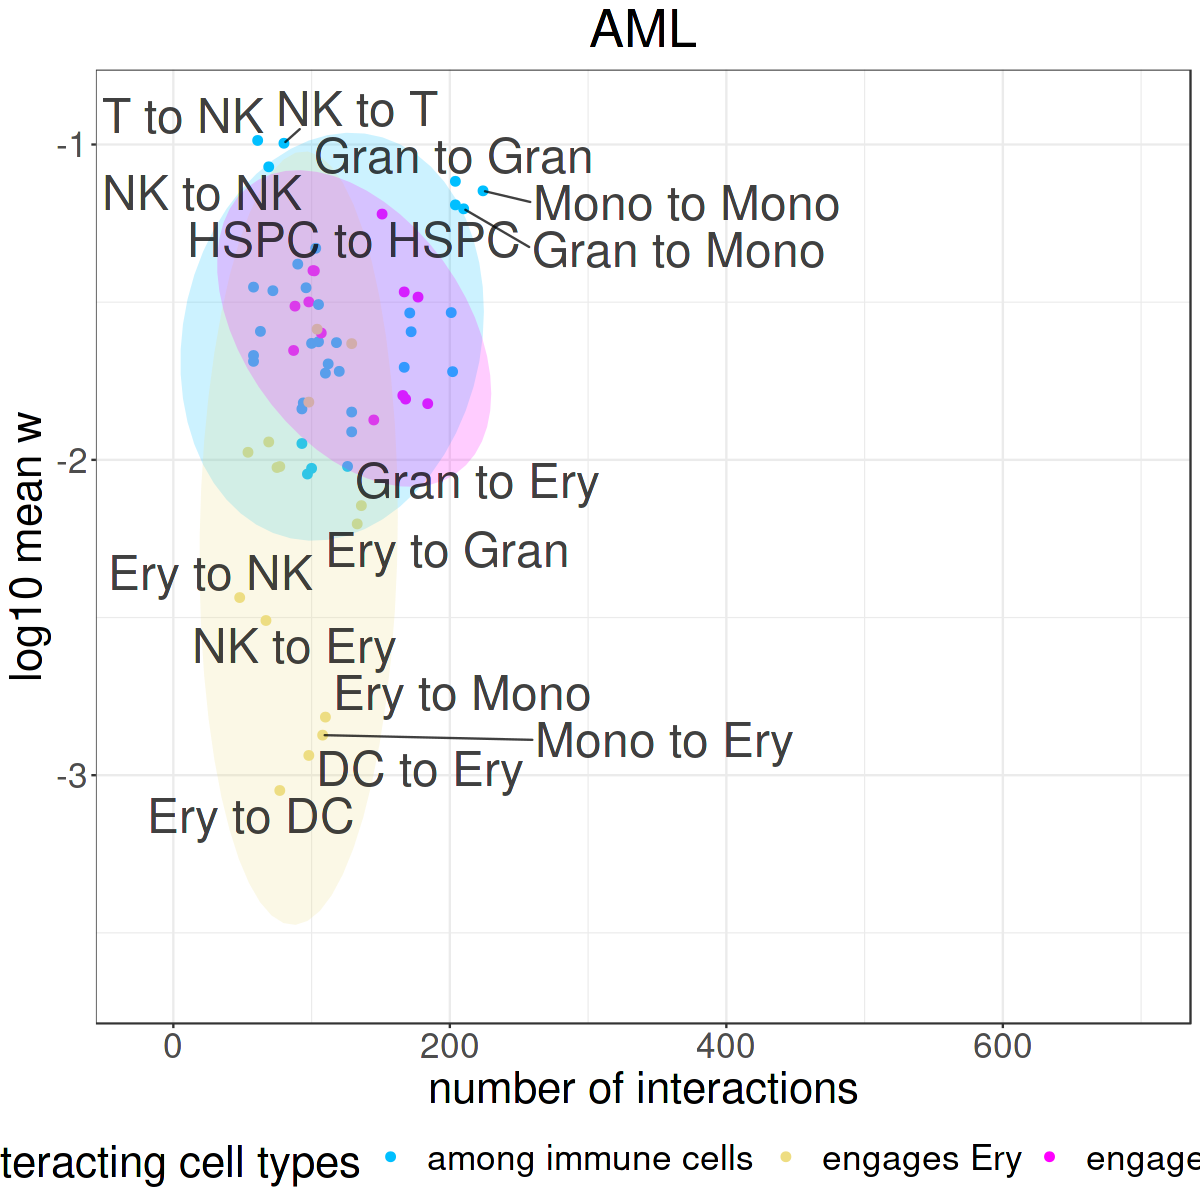

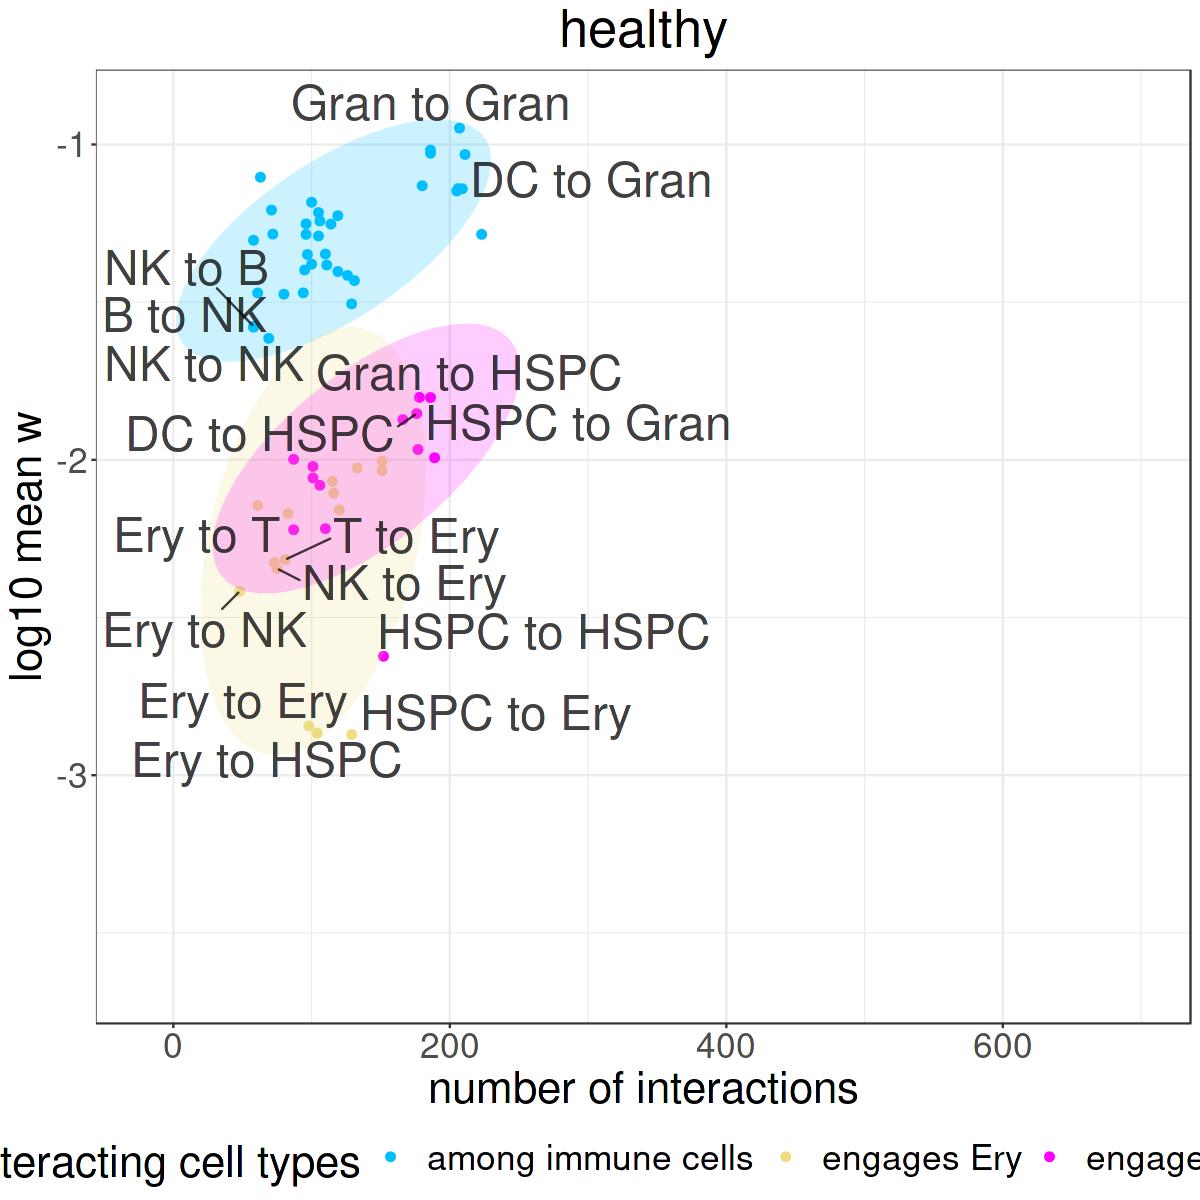

In [13]:
# plot mumber of interactions vs mean interaction weights per cell type to cell type interaction
options(repr.plot.width = 10
        ,repr.plot.height = 10)

ylim <- c(-3.65, -0.9)
xlim <- c(-20, 700)

plot_nrInt_vs_meanW_perCellType(interactions
                               ,interaction_type = interaction_type
                               ,colors = colors_interaction_type
                               ,ylim = ylim
                               ,label_font_size = 10)

### Ligand-receptor families

## Visualization of differential interactions

### Voclano

In [14]:
print("downregulated:")
print(sum(idx_down & idx_sign))

print("upregulated:")
print(sum(idx_up & idx_sign))

[1] "downregulated:"
[1] 646
[1] "upregulated:"
[1] 7


In [15]:
# REMOVE THIS AFTER RECOMPILING THE PACKAGE!!!

# recalculate log2FC of w
interactions$anno_interactions$log2FC_weights <- log2FC(x = interactions$weights,anno_samples = interactions$anno_samples)

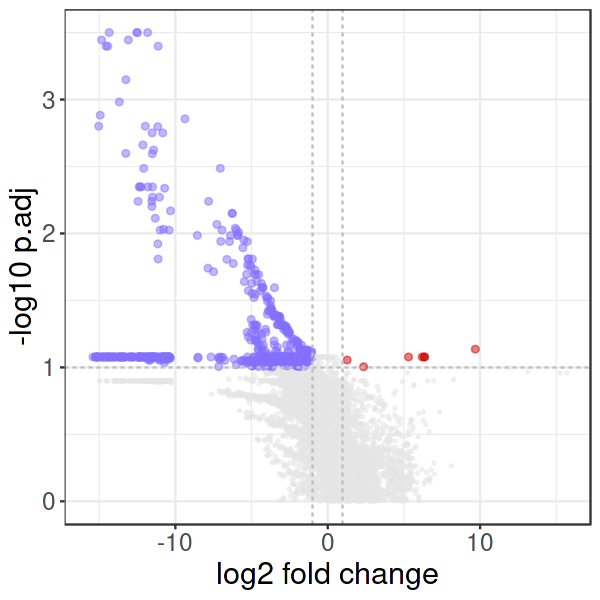

In [16]:
# volcano plot
options(repr.plot.height = 5
       ,repr.plot.width = 5)
    
plot_vulcano(interactions)

### Heatmap top differential

In [17]:
library(ComplexHeatmap) # to plot heatmaps
library(circlize) # for gragient colors

Loading required package: grid

ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

Thi

In [18]:
# heatmap of interactions weight of top differential interactions
# top adjusted p value
idx_topsign <- interactions$anno_interactions$p.adj %in% unique(sort(interactions$anno_interactions$p.adj))[1:300]
idx_topdown <- interactions$anno_interactions$log2FC_weights < -1 & idx_topsign
idx_topdown20 <- interactions$anno_interactions$interaction_ID %in% interactions$anno_interactions$interaction_ID[idx_topdown][1:8]

# all upregulated interactions
idx_topsign <- interactions$anno_interactions$p.adj %in% unique(sort(interactions$anno_interactions$p.adj))[1:500]
idx_topup <- interactions$anno_interactions$log2FC_weights > 1 & idx_topsign
idx_topup5 <- interactions$anno_interactions$interaction_ID %in% interactions$anno_interactions$interaction_ID[idx_topup][1:7]

# top 20 downregulated interactions

idx <- idx_topup5 | idx_topdown20
print(sum(idx))

[1] 15


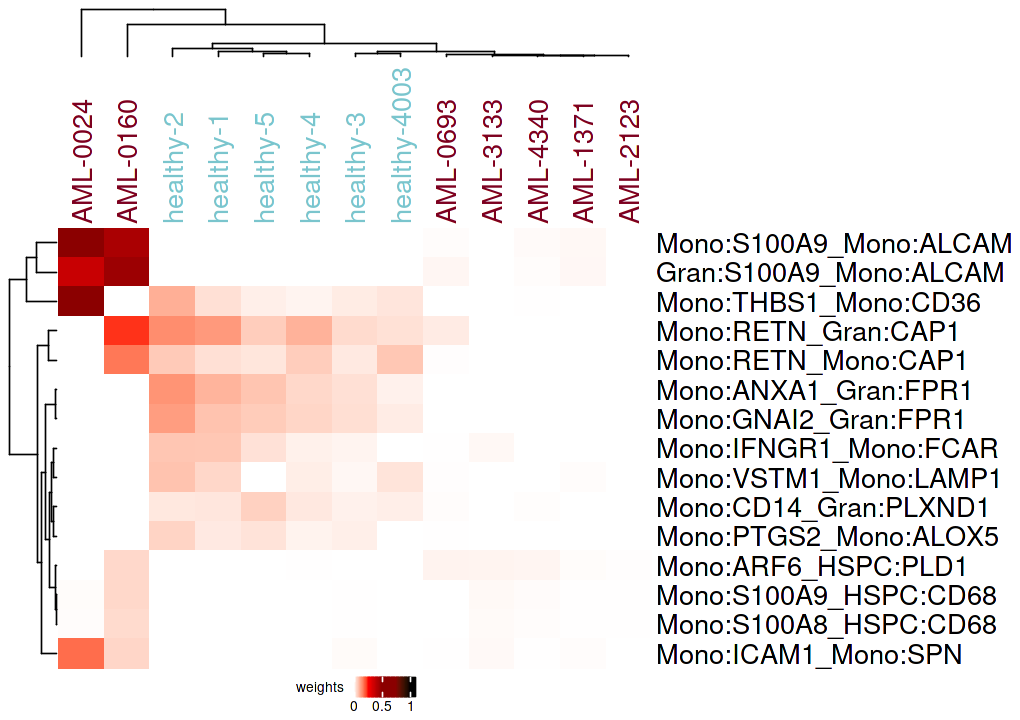

In [19]:
set.seed(3)
options(repr.plot.height = 6
       ,repr.plot.width = 8.5
       )
plot_heatmap(interactions
            ,which_interactions = idx
            ,values_to_plot = "weights"
            ,row_font_size = 16
            ,column_font_size = 16
            )

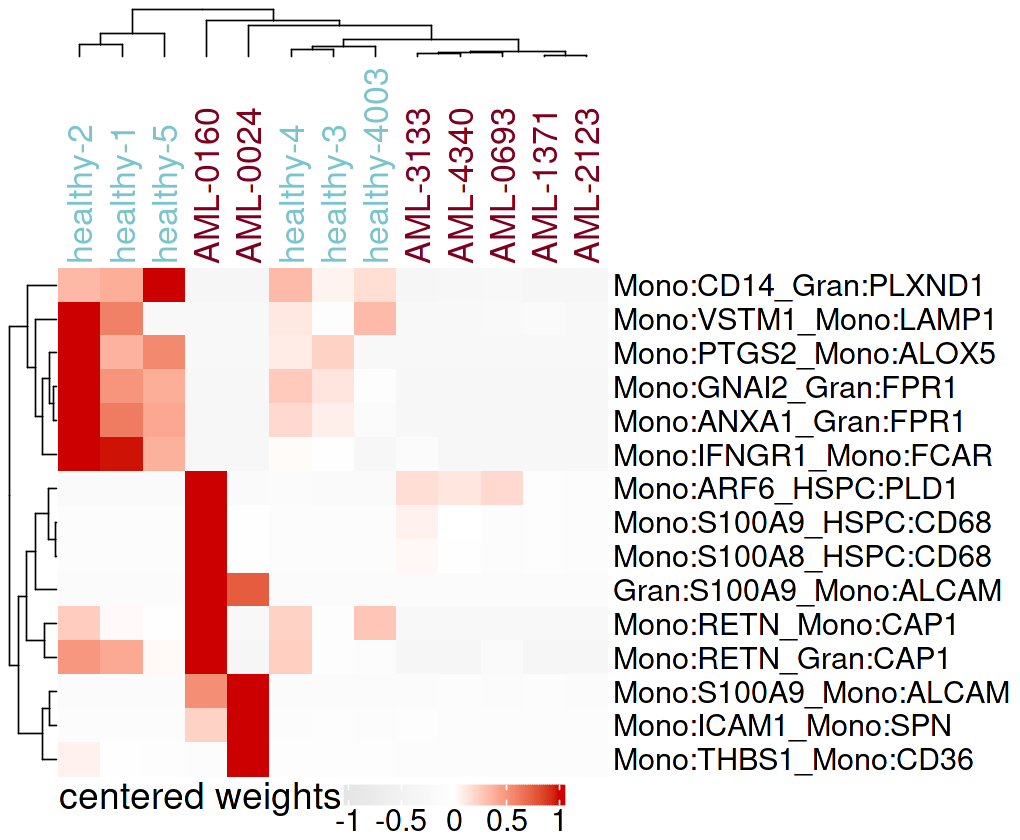

In [20]:
# centred Heatmap
set.seed(3)
options(repr.plot.height = 7
       ,repr.plot.width = 8.5
       )
plot_heatmap(interactions
            ,which_interactions = idx
            ,values_to_plot = "weights"
            ,row_font_size =18
            ,column_font_size = 20
             ,centered = TRUE
             ,color_values = circlize::colorRamp2(c(-1,0,1), c("gray90","white", "red3"))
             ,legend_title_font_size = 22
             ,labels_font_size = 18
            )

### Barplot with cell type of differential interactions

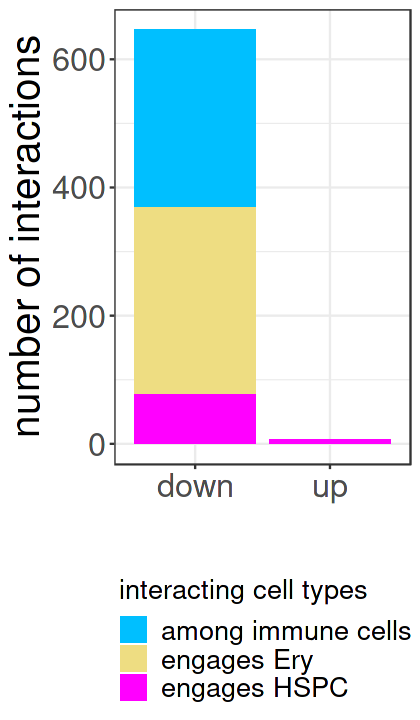

In [21]:
# stacked bar interaction classes: up- and downregulated
options(repr.plot.width = 3.5
       ,repr.plot.height = 6)

plot_stacked_bar(interactions
                ,idx_up = idx_up
                ,idx_down = idx_down
                ,idx_sign = idx_sign
                ,interaction_type = interaction_type_by_ID
                ,colors = colors_interaction_type
                ,font_size = 24
                )+
theme(legend.text = element_text(size=16)
      ,legend.title = element_text(size=16)
     ,legend.position = "bottom"
     ,legend.direction = "vertical")

### Network plots

In [22]:
library(igraph) # to plot circus plots


Attaching package: ‘igraph’


The following object is masked from ‘package:circlize’:

    degree


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




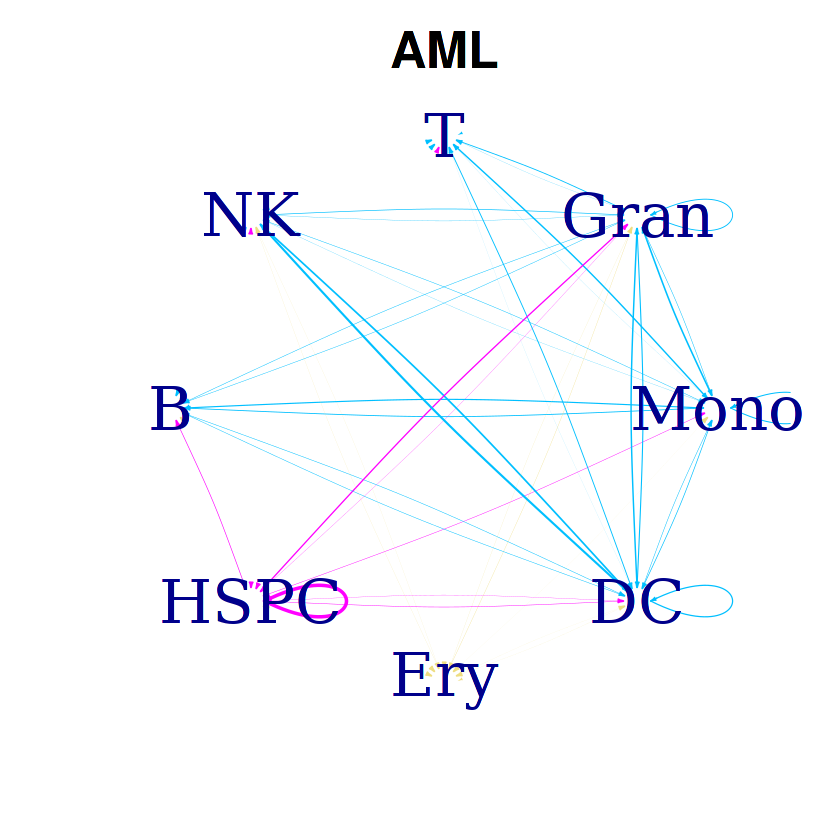

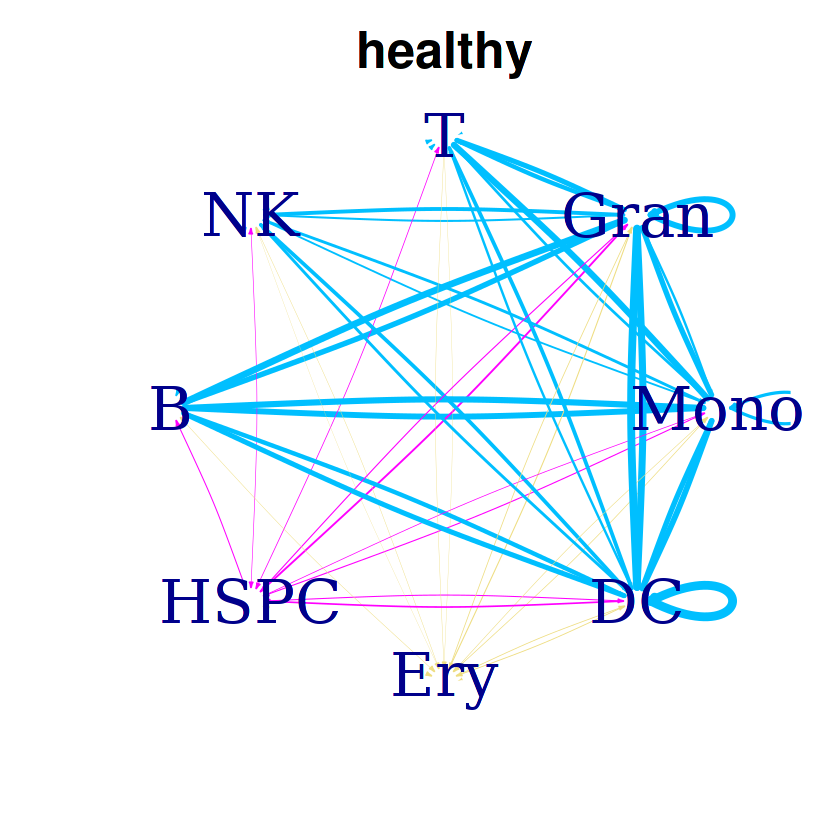

In [23]:
options(repr.plot.width = 7
       ,repr.plot.height = 7)

colors <- colors_interaction_type[interaction_type]
names(colors) <- names(interaction_type)

plor_celltype_network(interactions
                     ,edge.color = colors
                     ,title_cex = 2.5
                     ,vertex.label.cex = 3
                     ,edge.arrow.size = 0.2
                     ,verbose = FALSE
                     )

### Ligand-receptor families

## Visualization of individual components

<img src="components_scheme.png">

### Forest plots

In [24]:
library(gridExtra) 

In [25]:
# indices

idx_sign <- !is.na(interactions$anno_interactions$sign) & interactions$anno_interactions$sign
idx_good <- interactions$anno_interactions$passed_QC_filter

idx_up <- interactions$anno_interactions$log2FC_weights >1
idx_unchanged <- abs(interactions$anno_interactions$log2FC_weights)<=1
idx_down <- interactions$anno_interactions$log2FC_weights < -1

idx_only_rho_s <- interactions$anno_interactions$components_affected_s == "rho" & interactions$anno_interactions$nr_comp_affected_b == 1 
idx_only_rho_r <- interactions$anno_interactions$components_affected_r == "rho" & interactions$anno_interactions$nr_comp_affected_b == 1 
idx_only_phi_s <- interactions$anno_interactions$components_affected_s == "phi" & interactions$anno_interactions$nr_comp_affected_b == 1 
idx_only_phi_r <- interactions$anno_interactions$components_affected_r == "phi" & interactions$anno_interactions$nr_comp_affected_b == 1 
idx_only_p_s <- interactions$anno_interactions$components_affected_s == "p" & interactions$anno_interactions$nr_comp_affected_b == 1 
idx_only_p_r <- interactions$anno_interactions$components_affected_r == "p" & interactions$anno_interactions$nr_comp_affected_b == 1 

idx_nrComp_s_none <- interactions$anno_interactions$nr_comp_affected_s == 0
idx_nrComp_s_one <- interactions$anno_interactions$nr_comp_affected_s == 1
idx_nrComp_s_several <- interactions$anno_interactions$nr_comp_affected_s >1

idx_nrComp_r_none <- interactions$anno_interactions$nr_comp_affected_r == 0
idx_nrComp_r_one <- interactions$anno_interactions$nr_comp_affected_r == 1
idx_nrComp_r_several <- interactions$anno_interactions$nr_comp_affected_r >1

idx_no_change <- interactions$anno_interactions$interaction_category == "no_change"
idx_simple_decrease <- interactions$anno_interactions$interaction_category == "simple_decrease"
idx_simple_increase <- interactions$anno_interactions$interaction_category == "simple_increase"
idx_concordant_decrease <- interactions$anno_interactions$interaction_category == "concordant_decrease"
idx_concordant_increase <- interactions$anno_interactions$interaction_category == "concordant_increase"
idx_insufficient_comp <- interactions$anno_interactions$interaction_category == "insufficient_compensation"
idx_sufficient_comp <- interactions$anno_interactions$interaction_category == "sufficient_compensation"

In [26]:
# ordered IDs

# no change
ID_order_no_change <- order_interactions_for_forests(interactions$anno_interactions[!idx_sign & 
                                                                                     idx_good &
                                                                                     idx_no_change
                                                                                   ,]
                                                   )$interaction_ID

# simpe down: rho_s -> phi_s -> p_s -> rho_r -> phi_r -> p_r
ID_order_rho_s_only_down <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                     idx_simple_decrease &
                                                                                     idx_only_rho_s 
                                                                                    ,]
                                                   )$interaction_ID

ID_order_phi_s_only_down <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                     idx_simple_decrease &
                                                                                     idx_only_phi_s 
                                                                                    ,]
                                                   )$interaction_ID

ID_order_p_s_only_down <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_simple_decrease &
                                                                                   idx_only_p_s 
                                                                                   ,]
                                                   )$interaction_ID

ID_order_rho_r_only_down <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                     idx_simple_decrease &
                                                                                     idx_only_rho_r
                                                                                    ,]
                                                   )$interaction_ID

ID_order_phi_r_only_down <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                     idx_simple_decrease &
                                                                                     idx_only_phi_r
                                                                                    ,]
                                                   )$interaction_ID

ID_order_p_r_only_down <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_simple_decrease &
                                                                                   idx_only_p_r 
                                                                                   ,]
                                                   )$interaction_ID

# simpe up: rho_s -> phi_s -> p_s -> rho_r -> phi_r -> p_r
ID_order_rho_s_only_up <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                     idx_simple_increase &
                                                                                     idx_only_rho_s 
                                                                                    ,]
                                                   )$interaction_ID

ID_order_phi_s_only_up <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                     idx_simple_increase &
                                                                                     idx_only_phi_s 
                                                                                    ,]
                                                   )$interaction_ID

ID_order_p_s_only_up <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_simple_increase &
                                                                                   idx_only_p_s 
                                                                                   ,]
                                                   )$interaction_ID

ID_order_rho_r_only_up <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                     idx_simple_increase &
                                                                                     idx_only_rho_r
                                                                                    ,]
                                                   )$interaction_ID

ID_order_phi_r_only_up <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                     idx_simple_increase &
                                                                                     idx_only_phi_r
                                                                                    ,]
                                                   )$interaction_ID

ID_order_p_r_only_up <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_simple_increase &
                                                                                   idx_only_p_r 
                                                                                   ,]
                                                   )$interaction_ID

# concordant down: sender -> receiver -> both
ID_order_concordantDown_s <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_decrease &
                                                                                   idx_nrComp_s_several &
                                                                                   idx_nrComp_r_none
                                                                                   ,]
                                                   )$interaction_ID

ID_order_concordantDown_r <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_decrease &
                                                                                   idx_nrComp_r_several &
                                                                                   idx_nrComp_s_none
                                                                                   ,]
                                                   )$interaction_ID

ID_order_concordantDown_b_one_one <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_decrease &
                                                                                   idx_nrComp_s_one &
                                                                                   idx_nrComp_r_one
                                                                                   ,]
                                                   )$interaction_ID

ID_order_concordantDown_b_one_several <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_decrease &
                                                                                   idx_nrComp_s_one &
                                                                                   idx_nrComp_r_several
                                                                                   ,]
                                                   )$interaction_ID

ID_order_concordantDown_b_several_one <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_decrease &
                                                                                   idx_nrComp_s_several &
                                                                                   idx_nrComp_r_one
                                                                                   ,]
                                                   )$interaction_ID

ID_order_concordantDown_b_several_several <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_decrease &
                                                                                   idx_nrComp_s_several &
                                                                                   idx_nrComp_r_several
                                                                                   ,]
                                                   )$interaction_ID

# concordant up: sender -> receiver -> both
ID_order_concordantUp_s <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_increase &
                                                                                   idx_nrComp_s_several &
                                                                                   idx_nrComp_r_none
                                                                                   ,]
                                                   )$interaction_ID

ID_order_concordantUp_r <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_increase &
                                                                                   idx_nrComp_r_several &
                                                                                   idx_nrComp_s_none
                                                                                   ,]
                                                   )$interaction_ID

ID_order_concordantUp_b_one_one <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_increase &
                                                                                   idx_nrComp_s_one &
                                                                                   idx_nrComp_r_one
                                                                                   ,]
                                                   )$interaction_ID

ID_order_concordantUp_b_one_several <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_increase &
                                                                                   idx_nrComp_s_one &
                                                                                   idx_nrComp_r_several
                                                                                   ,]
                                                   )$interaction_ID

ID_order_concordantUp_b_several_one <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_increase &
                                                                                   idx_nrComp_s_several &
                                                                                   idx_nrComp_r_one
                                                                                   ,]
                                                   )$interaction_ID

ID_order_concordantUp_b_several_several <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_increase &
                                                                                   idx_nrComp_s_several &
                                                                                   idx_nrComp_r_several
                                                                                   ,]
                                                   )$interaction_ID

# insufficiend compensation down: sender -> receiver -> both
ID_order_insuffDown_s <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_down & 
                                                                                   idx_insufficient_comp &
                                                                                   idx_nrComp_s_several &
                                                                                   idx_nrComp_r_none
                                                                                   ,]
                                                   )$interaction_ID

ID_order_insuffDown_r <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_down & 
                                                                                   idx_insufficient_comp &
                                                                                   idx_nrComp_r_several &
                                                                                   idx_nrComp_s_none
                                                                                   ,]
                                                   )$interaction_ID

ID_order_insuffDown_b <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_down & 
                                                                                   idx_insufficient_comp &
                                                                                   (idx_nrComp_s_one | idx_nrComp_s_several) &
                                                                                   (idx_nrComp_r_one | idx_nrComp_r_several)
                                                                                   ,]
                                                   )$interaction_ID

# insufficiend compensation up: sender -> receiver -> both
ID_order_insuffUp_s <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_up & 
                                                                                   idx_insufficient_comp &
                                                                                   idx_nrComp_s_several &
                                                                                   idx_nrComp_r_none
                                                                                   ,]
                                                   )$interaction_ID

ID_order_insuffUp_r <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_up & 
                                                                                   idx_insufficient_comp &
                                                                                   idx_nrComp_r_several &
                                                                                   idx_nrComp_s_none
                                                                                   ,]
                                                   )$interaction_ID

ID_order_insuffUp_b <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_up & 
                                                                                   idx_insufficient_comp &
                                                                                   (idx_nrComp_s_one | idx_nrComp_s_several) &
                                                                                   (idx_nrComp_r_one | idx_nrComp_r_several)
                                                                                   ,]
                                                   )$interaction_ID

# sufficient compensation: sender -> receiver -> both
ID_order_suffComp_s <- order_interactions_for_forests(interactions$anno_interactions[!idx_sign & 
                                                                                     idx_good &
                                                                                   idx_sufficient_comp &
                                                                                   idx_nrComp_s_several &
                                                                                   idx_nrComp_r_none
                                                                                   ,]
                                                   )$interaction_ID

ID_order_suffComp_r <- order_interactions_for_forests(interactions$anno_interactions[!idx_sign & 
                                                                                     idx_good &
                                                                                   idx_sufficient_comp &
                                                                                   idx_nrComp_r_several &
                                                                                   idx_nrComp_s_none
                                                                                   ,]
                                                   )$interaction_ID

ID_order_suffComp_b <- order_interactions_for_forests(interactions$anno_interactions[!idx_sign & 
                                                                                     idx_good &
                                                                                   idx_sufficient_comp &
                                                                                   (idx_nrComp_s_one | idx_nrComp_s_several) &
                                                                                   (idx_nrComp_r_one | idx_nrComp_r_several)
                                                                                   ,]
                                                   )$interaction_ID

In [27]:
IDs_all <- as.character(c(ID_order_no_change
                          ,ID_order_rho_s_only_down
                          ,ID_order_phi_s_only_down
                          ,ID_order_p_s_only_down
                          ,ID_order_rho_r_only_down
                          ,ID_order_phi_r_only_down
                          ,ID_order_p_r_only_down
                          ,ID_order_rho_s_only_up
                          ,ID_order_phi_s_only_up
                          ,ID_order_p_s_only_up
                          ,ID_order_rho_r_only_up
                          ,ID_order_phi_r_only_up
                          ,ID_order_p_r_only_up
                          ,ID_order_concordantDown_s
                          ,ID_order_concordantDown_r
                          ,ID_order_concordantDown_b_one_one
                          ,ID_order_concordantDown_b_one_several
                          ,ID_order_concordantDown_b_several_one
                          ,ID_order_concordantDown_b_several_several
                          ,ID_order_concordantUp_s
                          ,ID_order_concordantUp_r
                          ,ID_order_concordantUp_b_one_one
                          ,ID_order_concordantUp_b_one_several
                          ,ID_order_concordantUp_b_several_one
                          ,ID_order_concordantUp_b_several_several
                          ,ID_order_insuffDown_s
                          ,ID_order_insuffDown_r
                          ,ID_order_insuffDown_b
                          ,ID_order_insuffUp_s
                          ,ID_order_insuffUp_r
                          ,ID_order_insuffUp_b
                          ,ID_order_suffComp_s
                          ,ID_order_suffComp_r
                          ,ID_order_suffComp_b
                         )
                       )

# revert
IDs_all <- IDs_all[length(IDs_all):1]

print(str(IDs_all))

 chr [1:2391] "B:TGFB1_DC:SMAD3" "B:TGFB1_DC:LPP" "B:LGALS1_DC:PTPRC" ...
NULL


#### Split by category

In [28]:
rownames(interactions$anno_interactions) <- interactions$anno_interactions$interaction_ID
of_interest <- interactions$anno_interactions[IDs_all,]

idx_log2FC_w_min <- of_interest$log2FC_weights == min(of_interest$log2FC_weights)
ID_log2FC_w_min <- of_interest$interaction_ID[idx_log2FC_w_min][1]

idx_log2FC_w_max <- of_interest$log2FC_weights == max(of_interest$log2FC_weights)
ID_log2FC_w_max <- of_interest$interaction_ID[idx_log2FC_w_max][1]


idx_log2FC_rho_s_min <- of_interest$log2FC_rho_s == min(of_interest$log2FC_rho_s)
ID_log2FC_rho_s_min <- of_interest$interaction_ID[idx_log2FC_rho_s_min][1]

idx_log2FC_rho_s_max <- of_interest$log2FC_rho_s == max(of_interest$log2FC_rho_s)
ID_log2FC_rho_s_max <- of_interest$interaction_ID[idx_log2FC_rho_s_max][1]


idx_log2FC_phi_s_min <- of_interest$log2FC_phi_s_l == min(of_interest$log2FC_phi_s_l)
ID_log2FC_phi_s_min <- of_interest$interaction_ID[idx_log2FC_phi_s_min][1]

idx_log2FC_phi_s_max <- of_interest$log2FC_phi_s_l == max(of_interest$log2FC_phi_s_l)
ID_log2FC_phi_s_max <- of_interest$interaction_ID[idx_log2FC_phi_s_max][1]


idx_log2FC_p_s_min <- of_interest$log2FC_p_s_l == min(of_interest$log2FC_p_s_l)
ID_log2FC_p_s_min <- of_interest$interaction_ID[idx_log2FC_p_s_min][1]

idx_log2FC_p_s_max <- of_interest$log2FC_p_s_l == max(of_interest$log2FC_p_s_l)
ID_log2FC_p_s_max <- of_interest$interaction_ID[idx_log2FC_p_s_max][1]


idx_log2FC_rho_r_min <- of_interest$log2FC_rho_r == min(of_interest$log2FC_rho_r)
ID_log2FC_rho_r_min <- of_interest$interaction_ID[idx_log2FC_rho_r_min][1]

idx_log2FC_rho_r_max <- of_interest$log2FC_rho_r == max(of_interest$log2FC_rho_r)
ID_log2FC_rho_r_max <- of_interest$interaction_ID[idx_log2FC_rho_r_max][1]


idx_log2FC_phi_r_min <- of_interest$log2FC_phi_r_r == min(of_interest$log2FC_phi_r_r)
ID_log2FC_phi_r_min <- of_interest$interaction_ID[idx_log2FC_phi_r_min][1]

idx_log2FC_phi_r_max <- of_interest$log2FC_phi_r_r == max(of_interest$log2FC_phi_r_r)
ID_log2FC_phi_r_max <- of_interest$interaction_ID[idx_log2FC_phi_r_max][1]


idx_log2FC_p_r_min <- of_interest$log2FC_p_r_r == min(of_interest$log2FC_p_r_r)
ID_log2FC_p_r_min <- of_interest$interaction_ID[idx_log2FC_p_r_min][1]

idx_log2FC_p_r_max <- of_interest$log2FC_p_r_r == max(of_interest$log2FC_p_r_r)
ID_log2FC_p_r_max <- of_interest$interaction_ID[idx_log2FC_p_r_max][1]

rm(of_interest)

IDs_lim <- c(ID_log2FC_w_min
            ,ID_log2FC_w_max

            ,ID_log2FC_rho_s_min
            ,ID_log2FC_rho_s_max

            ,ID_log2FC_phi_s_min
            ,ID_log2FC_phi_s_max

            ,ID_log2FC_p_s_min
            ,ID_log2FC_p_s_max

            ,ID_log2FC_rho_r_min
            ,ID_log2FC_rho_r_max

            ,ID_log2FC_phi_r_min
            ,ID_log2FC_phi_r_max

            ,ID_log2FC_p_r_min
            ,ID_log2FC_p_r_max
            ) 

IDs_lim <- IDs_lim[!duplicated(IDs_lim)]

print(str(IDs_lim))

 chr [1:13] "DC:HSP90AA1_DC:LRP1" "HSPC:ARF6_HSPC:PLD1" "DC:GNAI2_NK:S1PR5" ...
NULL


[1] B:VIM_B:CD44      B:ST6GAL1_B:CD22  B:PIK3CA_B:IFNAR1 B:HMGB1_B:CXCR4  
[5] B:HLA-B_B:CANX    B:ADAM10_B:CD44  
1181 Levels: B:ADAM10_B:CD44 < B:ADAM10_Gran:CD44 < ... < T:VIM_Mono:CD44
[1] -0.3647476 -0.8118291 -0.5919649 -0.4573957 -0.6164074 -0.7787285


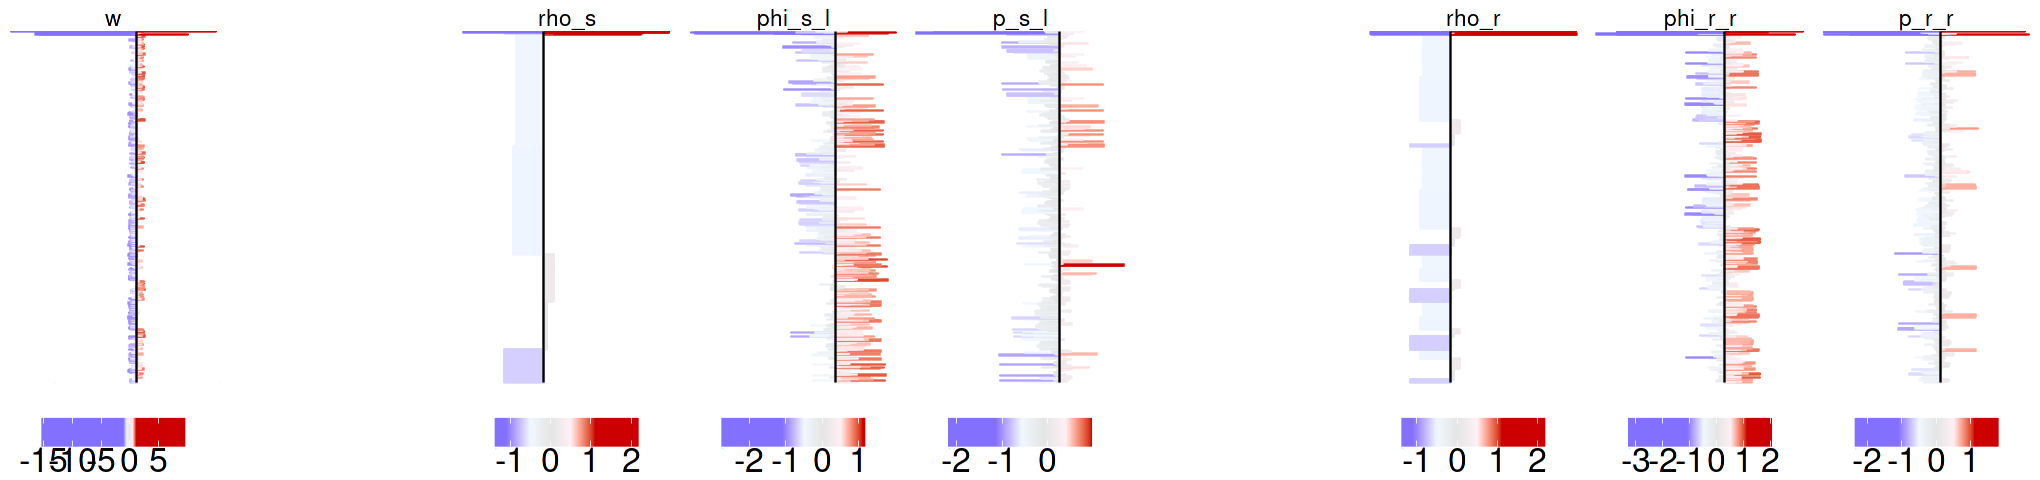

In [29]:
IDs <- as.character(c(ID_order_no_change
                     ))
IDs <- c(IDs_lim[!(IDs_lim %in% IDs)]
        ,IDs)

# revert
IDs <- IDs[length(IDs):1]

options(repr.plot.width = 17
       ,repr.plot.height = 4)

rownames(interactions$anno_interactions) <- interactions$anno_interactions$interaction_ID
my_anno_interactions <- interactions$anno_interactions[IDs,]
my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID
                                             ,ordered = TRUE
                                                    )

print(head(my_anno_interactions$interaction_ID))
print(head(my_anno_interactions$log2FC_weights))


plot_all_forests(my_idx = rep(TRUE,nrow(my_anno_interactions))
                 ,my_anno_interactions = my_anno_interactions
                 ,keep_order = TRUE
                 ,threshold = 1
                 ,legend_title_size = 0
                 ,legend_text_size = 20
                )

[1] NK:ARF6_Gran:SMAP1  NK:IFNGR1_Mono:FCAR T:ARF6_Gran:SMAP1  
[4] Gran:TLR2_Gran:CD14 NK:HLA-DRA_DC:CD63  NK:HLA-DRA_DC:CD37 
69 Levels: B:LGALS1_DC:PTPRC < B:SYK_Mono:FCGR2A < ... < T:PIK3CA_Mono:IFNAR2
[1] -3.608763 -3.796033 -2.951955 -1.197836 -1.410794 -1.654559


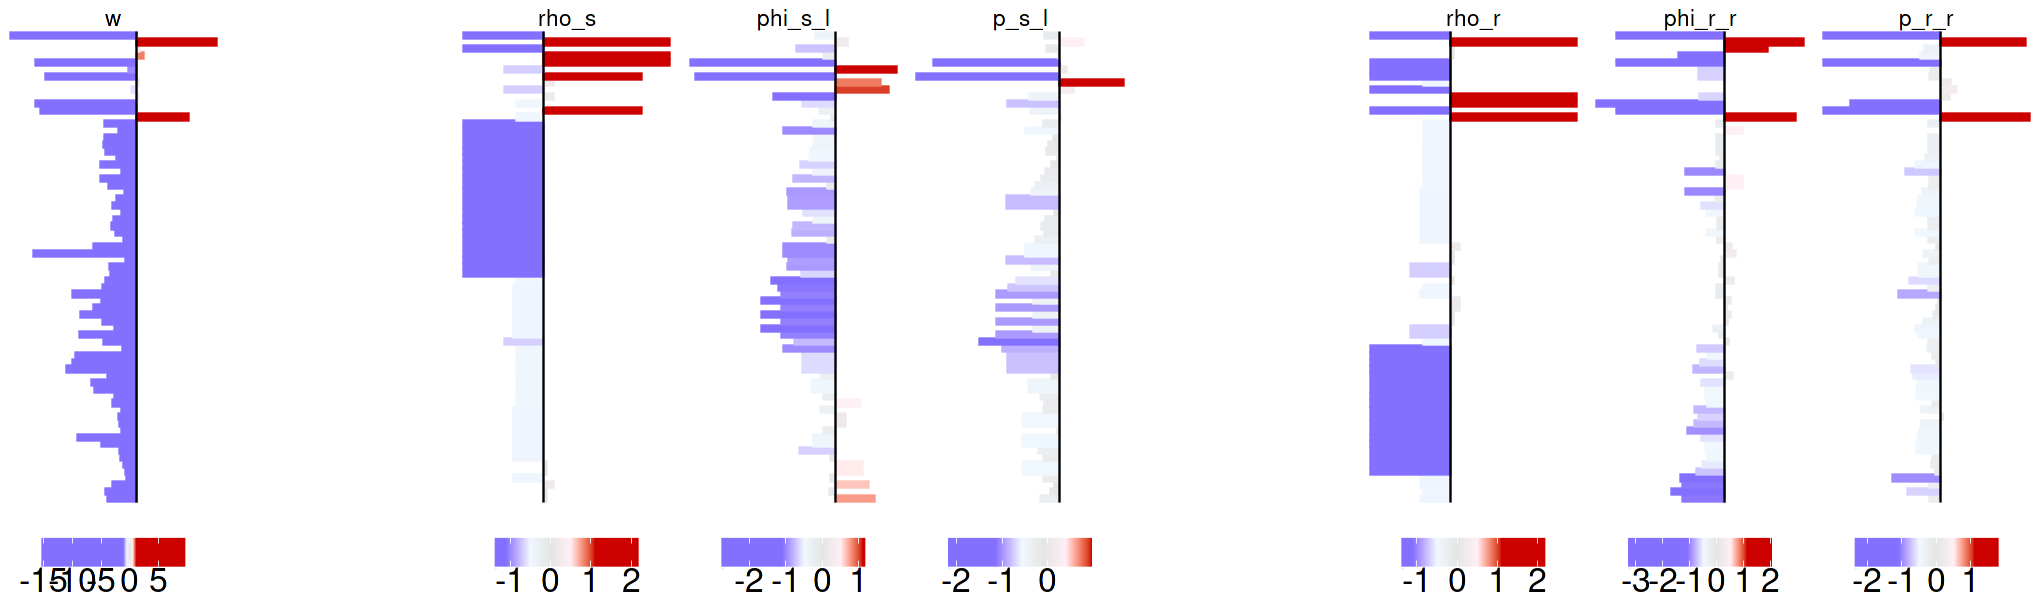

In [30]:
IDs <- as.character(c(ID_order_rho_s_only_down
                         ,ID_order_phi_s_only_down
                         ,ID_order_p_s_only_down
                         ,ID_order_rho_r_only_down
                         ,ID_order_phi_r_only_down
                         ,ID_order_p_r_only_down
                     ))
IDs <- c(IDs_lim[!(IDs_lim %in% IDs)]
        ,IDs)

# revert
IDs <- IDs[length(IDs):1]

options(repr.plot.width = 17
       ,repr.plot.height = 5#3
       )

rownames(interactions$anno_interactions) <- interactions$anno_interactions$interaction_ID
my_anno_interactions <- interactions$anno_interactions[IDs,]
my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID
                                             ,ordered = TRUE
                                                    )

print(head(my_anno_interactions$interaction_ID))
print(head(my_anno_interactions$log2FC_weights))


plot_all_forests(my_idx = rep(TRUE,nrow(my_anno_interactions))
                 ,my_anno_interactions = my_anno_interactions
                 ,keep_order = TRUE
                 ,threshold = 1
                 ,legend_title_size = 0
                 ,legend_text_size = 20
                )

[1] HSPC:MDK_Gran:SORL1    HSPC:MDK_Gran:NOTCH2   Mono:S100A9_HSPC:CD68 
[4] Ery:HSP90AA1_DC:LRP1   Mono:THBS1_HSPC:ITGA2B T:MAML2_HSPC:NOTCH2   
15 Levels: B:LGALS1_DC:PTPRC < B:TGFB1_DC:SMAD3 < ... < T:PIK3CA_Mono:IFNAR2
[1]   2.356483   1.278511   6.355587 -11.721997 -12.373554   0.260611


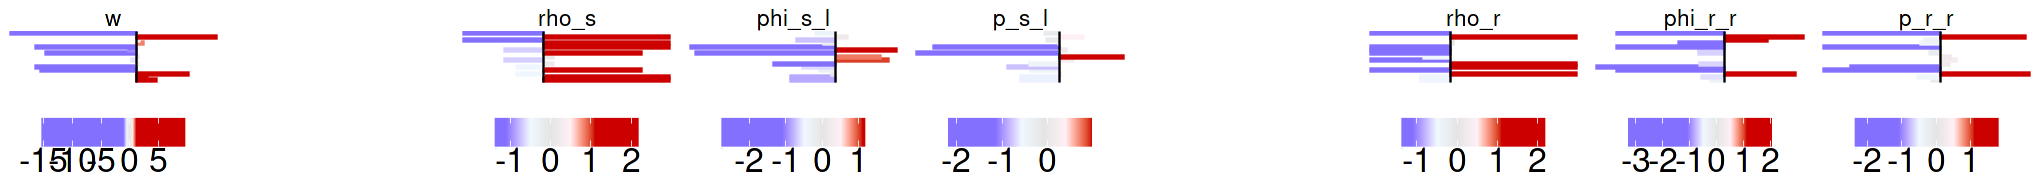

In [31]:
IDs <- as.character(c(ID_order_rho_s_only_up
                          ,ID_order_phi_s_only_up
                          ,ID_order_p_s_only_up
                          ,ID_order_rho_r_only_up
                          ,ID_order_phi_r_only_up
                          ,ID_order_p_r_only_up
                     ))
IDs <- c(IDs_lim[!(IDs_lim %in% IDs)]
        ,IDs)

# revert
IDs <- IDs[length(IDs):1]

options(repr.plot.width = 17
       ,repr.plot.height = 1.5)

rownames(interactions$anno_interactions) <- interactions$anno_interactions$interaction_ID
my_anno_interactions <- interactions$anno_interactions[IDs,]
my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID
                                             ,ordered = TRUE
                                                    )

print(head(my_anno_interactions$interaction_ID))
print(head(my_anno_interactions$log2FC_weights))


plot_all_forests(my_idx = rep(TRUE,nrow(my_anno_interactions))
                 ,my_anno_interactions = my_anno_interactions
                 ,keep_order = TRUE
                 ,threshold = 1
                 ,legend_title_size = 0
                 ,legend_text_size = 20
                )

[1] DC:FCGRT_Gran:LILRB2 DC:HLA-F_Gran:LILRB2 DC:FCGRT_DC:LILRB2  
[4] DC:HLA-F_DC:LILRB2   DC:LRPAP1_DC:LRP1    DC:FCN1_DC:LRP1     
189 Levels: B:B2M_DC:LILRB2 < B:B2M_Gran:LILRB2 < ... < T:PSAP_DC:LRP1
[1]  -2.408078  -2.755589  -2.695203  -2.651567 -14.462272 -15.116211


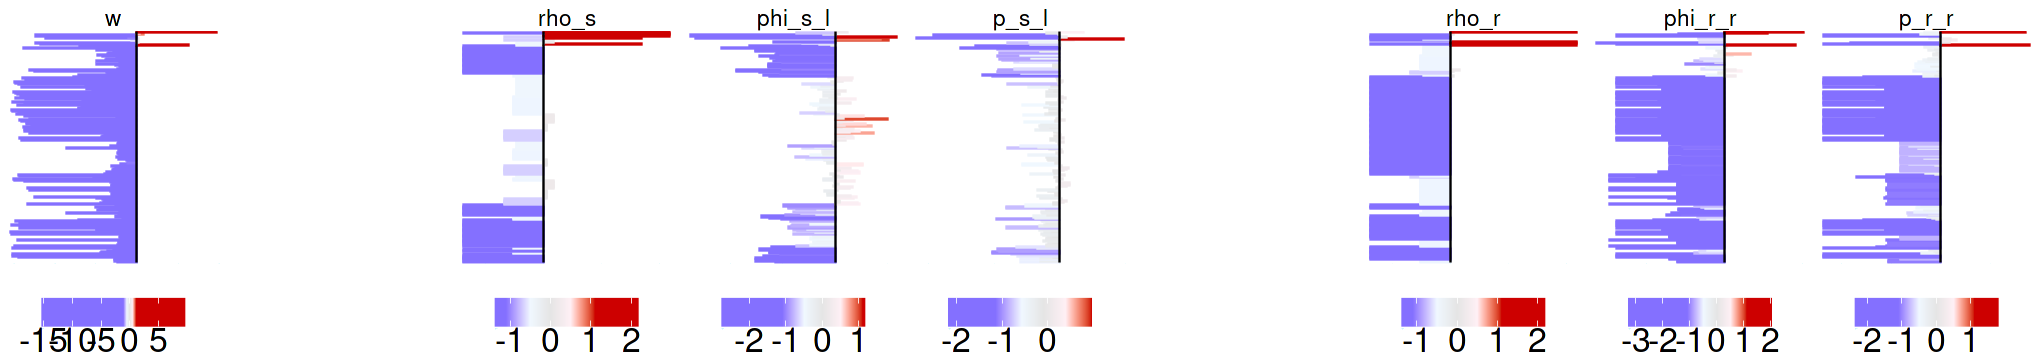

In [32]:
IDs <- as.character(c(ID_order_concordantDown_s
                          ,ID_order_concordantDown_r
                          ,ID_order_concordantDown_b_one_one
                          ,ID_order_concordantDown_b_one_several
                          ,ID_order_concordantDown_b_several_one
                          ,ID_order_concordantDown_b_several_several
                     ))
IDs <- c(IDs_lim[!(IDs_lim %in% IDs)]
        ,IDs)

# revert
IDs <- IDs[length(IDs):1]

options(repr.plot.width = 17
       ,repr.plot.height = 3)

rownames(interactions$anno_interactions) <- interactions$anno_interactions$interaction_ID
my_anno_interactions <- interactions$anno_interactions[IDs,]
my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID
                                             ,ordered = TRUE
                                                    )

print(head(my_anno_interactions$interaction_ID))
print(head(my_anno_interactions$log2FC_weights))


plot_all_forests(my_idx = rep(TRUE,nrow(my_anno_interactions))
                 ,my_anno_interactions = my_anno_interactions
                 ,keep_order = TRUE
                 ,threshold = 1
                 ,legend_title_size = 0
                 ,legend_text_size = 20
                )

[1] HSPC:ARF6_HSPC:PLD1   B:ARF6_HSPC:PLD1      Mono:S100A9_HSPC:CD68
[4] Mono:S100A8_HSPC:CD68 Mono:ARF6_HSPC:PLD1   Ery:HSP90AA1_DC:LRP1 
16 Levels: B:ARF6_HSPC:PLD1 < B:LGALS1_DC:PTPRC < ... < T:PIK3CA_Mono:IFNAR2
[1]   9.687684   5.305054   6.355587   6.349078   6.202918 -11.721997


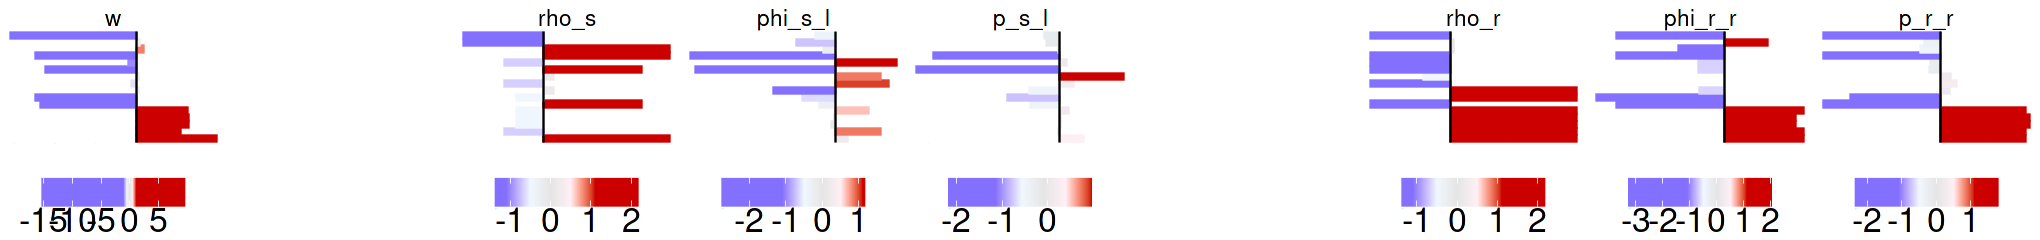

In [33]:
IDs <- as.character(c(ID_order_concordantUp_s
                          ,ID_order_concordantUp_r
                          ,ID_order_concordantUp_b_one_one
                          ,ID_order_concordantUp_b_one_several
                          ,ID_order_concordantUp_b_several_one
                          ,ID_order_concordantUp_b_several_several
                     ))
IDs <- c(IDs_lim[!(IDs_lim %in% IDs)]
        ,IDs)

# revert
IDs <- IDs[length(IDs):1]

options(repr.plot.width = 17
       ,repr.plot.height = 2)

rownames(interactions$anno_interactions) <- interactions$anno_interactions$interaction_ID
my_anno_interactions <- interactions$anno_interactions[IDs,]
my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID
                                             ,ordered = TRUE
                                                    )

print(head(my_anno_interactions$interaction_ID))
print(head(my_anno_interactions$log2FC_weights))


plot_all_forests(my_idx = rep(TRUE,nrow(my_anno_interactions))
                 ,my_anno_interactions = my_anno_interactions
                 ,keep_order = TRUE
                 ,threshold = 1
                 ,legend_title_size = 0
                 ,legend_text_size = 20
                )

[1] Gran:PRLR_Ery:EMC1    Gran:S100A12_Ery:CD36 T:MAML2_Ery:NOTCH2   
[4] Gran:CD14_Ery:RIPK1   Gran:CD14_Ery:PLXND1  Gran:CD14_Ery:ITGA4  
369 Levels: B:LGALS1_DC:PTPRC < B:LRPAP1_HSPC:CD320 < ... < T:PIK3CA_Mono:IFNAR2
[1] -10.411829  -3.596510 -10.320848 -11.146885 -11.503228  -6.068727


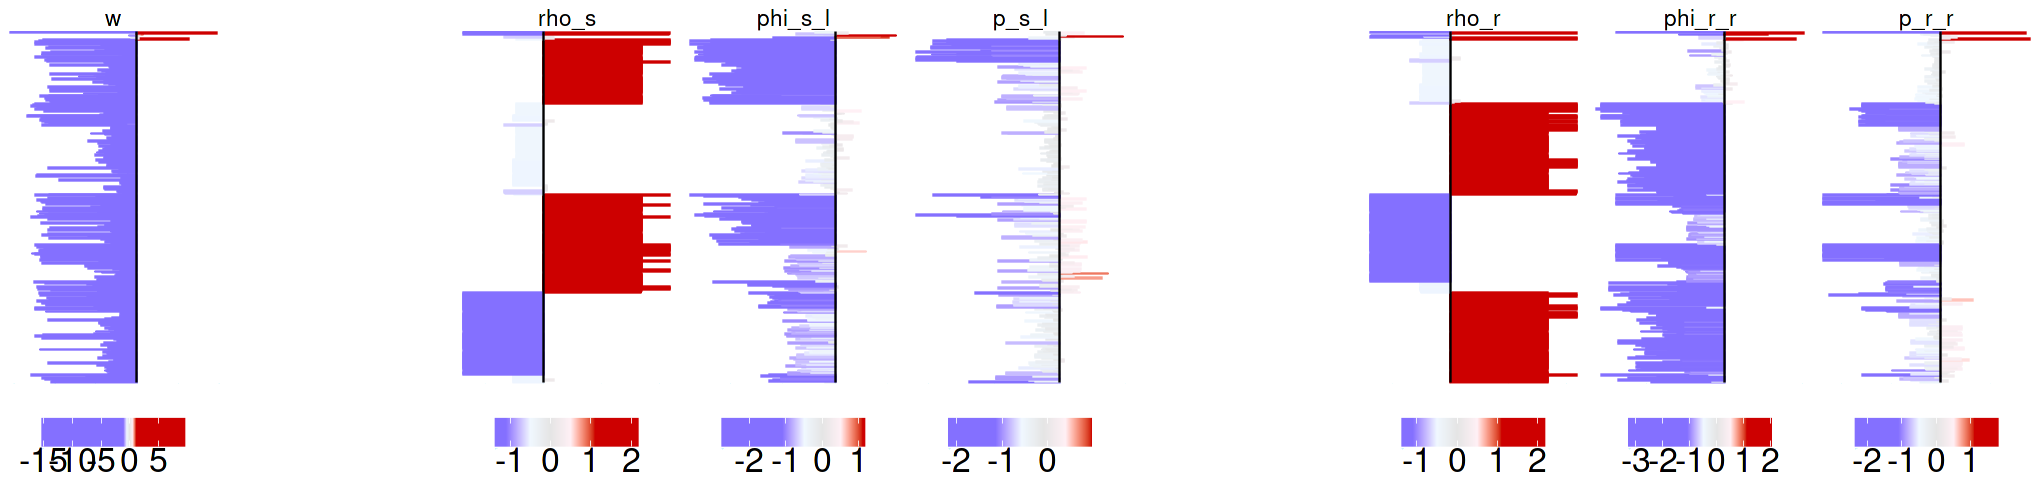

In [34]:
IDs <- as.character(c(ID_order_insuffDown_s
                          ,ID_order_insuffDown_r
                          ,ID_order_insuffDown_b
                     ))
IDs <- c(IDs_lim[!(IDs_lim %in% IDs)]
        ,IDs)

# revert
IDs <- IDs[length(IDs):1]

options(repr.plot.width = 17
       ,repr.plot.height = 4)

rownames(interactions$anno_interactions) <- interactions$anno_interactions$interaction_ID
my_anno_interactions <- interactions$anno_interactions[IDs,]
my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID
                                             ,ordered = TRUE
                                                    )

print(head(my_anno_interactions$interaction_ID))
print(head(my_anno_interactions$log2FC_weights))


plot_all_forests(my_idx = rep(TRUE,nrow(my_anno_interactions))
                 ,my_anno_interactions = my_anno_interactions
                 ,keep_order = TRUE
                 ,threshold = 1
                 ,legend_title_size = 0
                 ,legend_text_size = 20
                )

[1] Mono:S100A9_HSPC:CD68  Ery:HSP90AA1_DC:LRP1   Mono:THBS1_HSPC:ITGA2B
[4] T:MAML2_HSPC:NOTCH2    B:TGFB1_DC:SMAD3       T:PIK3CA_Mono:IFNAR2  
13 Levels: B:LGALS1_DC:PTPRC < B:TGFB1_DC:SMAD3 < ... < T:PIK3CA_Mono:IFNAR2
[1]   6.3555872 -11.7219973 -12.3735543   0.2606110  -0.5926325   0.1603389


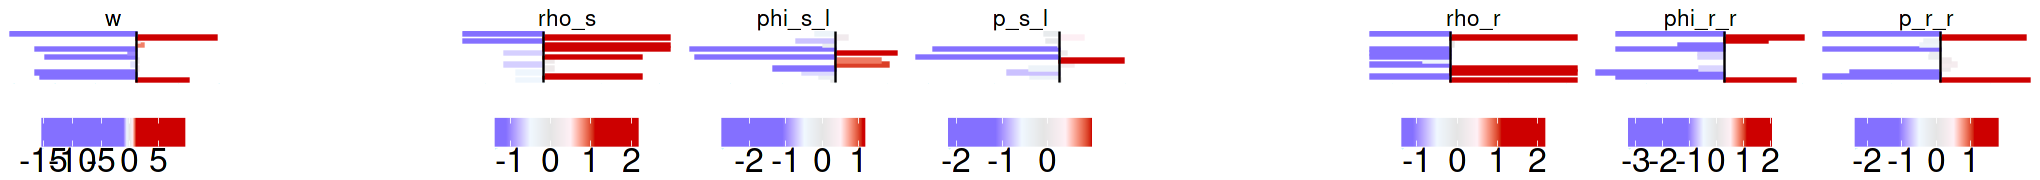

In [35]:
IDs <- as.character(c(ID_order_insuffUp_s
                          ,ID_order_insuffUp_r
                          ,ID_order_insuffUp_b
                     ))
IDs <- c(IDs_lim[!(IDs_lim %in% IDs)]
        ,IDs)

# revert
IDs <- IDs[length(IDs):1]

options(repr.plot.width = 17
       ,repr.plot.height = 1.5)

rownames(interactions$anno_interactions) <- interactions$anno_interactions$interaction_ID
my_anno_interactions <- interactions$anno_interactions[IDs,]
my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID
                                             ,ordered = TRUE
                                                    )

print(head(my_anno_interactions$interaction_ID))
print(head(my_anno_interactions$log2FC_weights))


plot_all_forests(my_idx = rep(TRUE,nrow(my_anno_interactions))
                 ,my_anno_interactions = my_anno_interactions
                 ,keep_order = TRUE
                 ,threshold = 1
                 ,legend_title_size = 0
                 ,legend_text_size = 20
                )

In [36]:
length(ID_order_suffComp_b)

[1] 284

[1] B:TGFB1_DC:SMAD3    B:TGFB1_DC:LPP      B:LGALS1_DC:PTPRC  
[4] B:CD99_DC:PILRA     B:SYK_Ery:EPOR      T:MAML2_HSPC:NOTCH2
630 Levels: B:ADAM10_Ery:CD44 < B:ADAM10_Ery:NOTCH2 < ... < T:UBC_HSPC:SMAD3
[1] -0.5926325 -0.9949870 -0.9877472 -0.7639546 -0.5570944  0.2606110


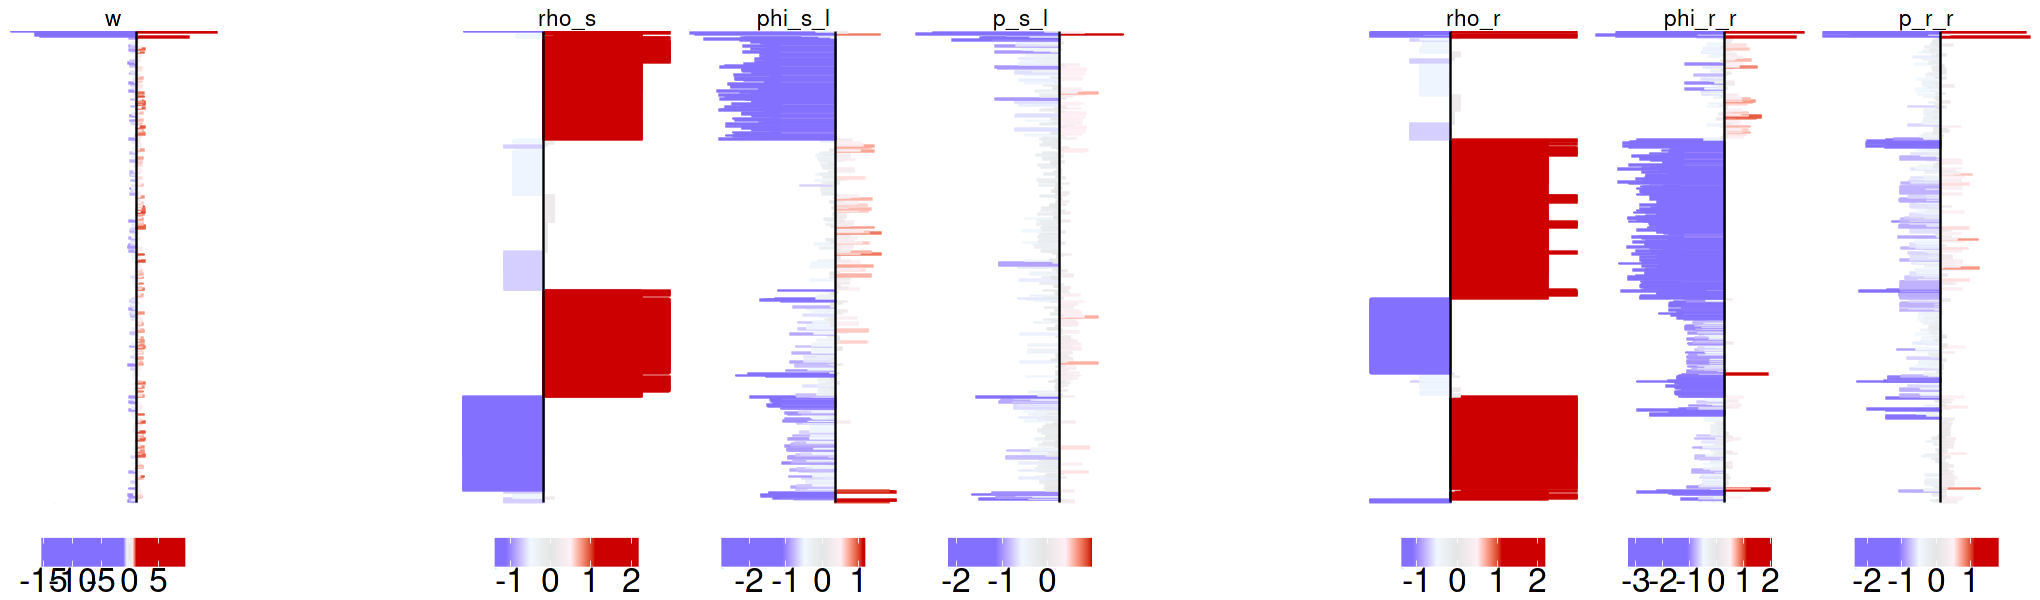

In [37]:
IDs <- as.character(c(ID_order_suffComp_s
                          ,ID_order_suffComp_r
                          ,ID_order_suffComp_b
                     ))
IDs <- c(IDs_lim[!(IDs_lim %in% IDs)]
        ,IDs)

# revert
IDs <- IDs[length(IDs):1]

options(repr.plot.width = 17
       ,repr.plot.height = 5)

rownames(interactions$anno_interactions) <- interactions$anno_interactions$interaction_ID
my_anno_interactions <- interactions$anno_interactions[IDs,]
my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID
                                             ,ordered = TRUE
                                                    )

print(head(my_anno_interactions$interaction_ID))
print(head(my_anno_interactions$log2FC_weights))


plot_all_forests(my_idx = rep(TRUE,nrow(my_anno_interactions))
                 ,my_anno_interactions = my_anno_interactions
                 ,keep_order = TRUE
                 ,threshold = 1
                 ,legend_title_size = 0
                 ,legend_text_size = 20
                )

In [38]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 22.04.2 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=de_DE.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=de_DE.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=de_DE.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=de_DE.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] gridExtra_2.3         igraph_1.4.2          circlize_0.4.15      
[4] ComplexHeatmap_2.10.0 ggrepel_0.9.2         ggplot2_3.4.2        
[7] community_1.3.5      

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-7    

In [5]:
interactions$anno_interactions

interaction_ID,ligand_gene_name,receptor_gene_name,sending_cell_type,receiving_cell_type,mean_e_s_l_control,mean_e_s_l_case,mean_e_r_r_control,mean_e_r_r_case,log2FC_rho_s,⋯,components_affected_s,components_affected_r,sender_or_receiver_affected,direction_s,direction_r,direction_b,concordance_s,concordance_r,concordance_b,interaction_category
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<chr>
Mono:A2M_Mono:LRP1,A2M,LRP1,Mono,Mono,0.0000000,0.0000000,0.8399304,0.77875613,-0.4546995,⋯,none,none,none,none,none,none,undefined,undefined,undefined,no_change
Mono:ACTR2_Mono:ADRB2,ACTR2,ADRB2,Mono,Mono,0.9545454,0.9185154,0.0000000,0.10837381,-0.4546995,⋯,none,phi,receiver,none,up,up,undefined,undefined,undefined,simple_increase
Mono:ACTR2_Mono:LDLR,ACTR2,LDLR,Mono,Mono,0.9545454,0.9185154,0.4157859,0.51674875,-0.4546995,⋯,none,none,none,none,none,none,undefined,undefined,undefined,undefined
Mono:ADM_Mono:ACKR3,ADM,ACKR3,Mono,Mono,0.3675036,0.6856992,0.0000000,0.10676803,-0.4546995,⋯,none,phi,receiver,none,up,up,undefined,undefined,undefined,simple_increase
Mono:ADM_Mono:ADRB2,ADM,ADRB2,Mono,Mono,0.3675036,0.6856992,0.0000000,0.10837381,-0.4546995,⋯,none,phi,receiver,none,up,up,undefined,undefined,undefined,undefined
Mono:ADM_Mono:CALCRL,ADM,CALCRL,Mono,Mono,0.3675036,0.6856992,0.0000000,0.00000000,-0.4546995,⋯,none,none,none,none,none,none,undefined,undefined,undefined,no_change
Mono:ADM_Mono:GPR84,ADM,GPR84,Mono,Mono,0.3675036,0.6856992,0.2322384,0.19765357,-0.4546995,⋯,none,none,none,none,none,none,undefined,undefined,undefined,undefined
Mono:ADM_Mono:RAMP1,ADM,RAMP1,Mono,Mono,0.3675036,0.6856992,0.0000000,0.00000000,-0.4546995,⋯,none,none,none,none,none,none,undefined,undefined,undefined,no_change
Mono:ADM_Mono:TSHR,ADM,TSHR,Mono,Mono,0.3675036,0.6856992,0.0000000,0.00000000,-0.4546995,⋯,none,none,none,none,none,none,undefined,undefined,undefined,no_change


In [6]:
library(nichenetr)

In [8]:
?process_table_to_ic